In [1]:
# Mohammad Asif Zaman
# June, 2018
# Animation of the motion a double-pendulum using Julia.

# ---revised Oct, 2020, Ying Ran

# Package requirements: 1. Plots, 2. Differential Equations, 3. Direckx
using Plots
using DifferentialEquations
using Dierckx

In [2]:
m1 = 1.5;                 # mass of pendulum 1 (in kg)
m2 = 1.;                 # mass of pendulum 2 (in kg)
L1 = 2.;                 # length of pendulum 1 (in meter)
L2 = 1.;                 # length of pendulum 2 (in meter)
g = 9.8;                # gravitatioanl acceleration constant (m/s^2)

u0 = [pi/1.6; 0; pi/1.8; 0];    # initial conditions. 
# u[1] = angle of the first pendulum
# u[2] = angular velocity of the first pendulum
# u[3] = angle of the second pendulum
# u[4] = angular velocity of the second pendulum

tfinal = 60.0;       # Final time. Simulation time = 0 to tfinal.

In [3]:
# Differential equations describing the system
function double_pendulum(du,u,p,t)
    # du = derivatives
    # u = variables
    # p = parameters
    # t = time variable
    
    m1 = p[1];
    m2 = p[2];
    L1 = p[3];
    L2 = p[4];
    g = p[5];
  
    
    c = cos(u[1]-u[3]);  # intermediate variables
    s = sin(u[1]-u[3]);  # intermediate variables

    
    du[1] = u[2];   # d(theta 1)
    du[2] = ( m2*g*sin(u[3])*c - m2*s*(L1*c*u[2]^2 + L2*u[4]^2) - (m1+m2)*g*sin(u[1]) ) /( L1 *(m1+m2*s^2) );
    du[3] = u[4];   # d(theta 2)   
    du[4] = ((m1+m2)*(L1*u[2]^2*s - g*sin(u[3]) + g*sin(u[1])*c) + m2*L2*u[4]^2*s*c) / (L2 * (m1 + m2*s^2));
    
end

double_pendulum (generic function with 1 method)

In [4]:
# Solving the system

p = [m1;  m2;  L1;  L2;  g];
tspan = (0.0,tfinal);  # Time span (limits). The actual time variable is automatically set by solve().
prob = ODEProblem(double_pendulum,u0,tspan,p);
sol = solve(prob,Vern7(),reltol=1e-6);

#sol[1,:] = u1 = Θ_1
#sol[2,:] = u2 = ω_1
#sol[3,:] = u3 = Θ_2
#sol[4,:] = u4 = ω_2
#sol.t = t = time variable. The ODE solver automatically chooses the time steps. Note that t is not uniformly spaced.



In [5]:
# Extract the variables from the solution 

tm = sol.t;

# Mapping from polar to Cartesian
x1 = L1*sin.(sol[1,:]);          # First Pendulum
y1 = -L1*cos.(sol[1,:]);

x2 = x1 + L2*sin.(sol[3,:]);     # Second Pendulum
y2 = y1 - L2*cos.(sol[3,:]);

In [6]:
# Interpolation
# https://github.com/kbarbary/Dierckx.jl

# Making the variables uniformly spaced. This is necessary to make the animation video valid. As the video is played at
# constant fps, it is important to make sure that the time interval between frames is constant. Without this, the apparant 
# velocities of the pendulums would not be properly scaled in the video.



dt = 0.05;
t_u = 0:dt:tfinal;      # uniformly spaced time variable

sp_x1 = Spline1D(tm, x1);
sp_y1 = Spline1D(tm, y1);
sp_x2 = Spline1D(tm, x2);
sp_y2 = Spline1D(tm, y2);


# Interpolated variables
x1_u = sp_x1(t_u);
y1_u = sp_y1(t_u);
x2_u = sp_x2(t_u);
y2_u = sp_y2(t_u);



┌ Info: Saved animation to 
│   fn = C:\Users\ranyi\OneDrive\Documents\GitHub\demos-content\anim.gif
└ @ Plots C:\Users\ranyi\.julia\packages\Plots\fewot\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\ranyi\\OneDrive\\Documents\\GitHub\\demos-content\\anim.gif")
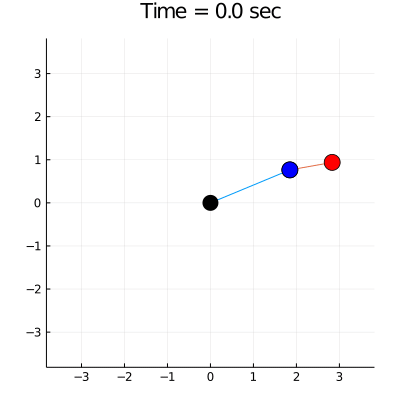

In [7]:
# Animation setup
# Refs.
# 1. http://docs.juliaplots.org/latest/attributes/
# 2. http://docs.juliaplots.org/latest/animations/

L = L1 + L2;
axis_lim = L*1.2;   # defining the limits of the axes

gr();  # using GR plotting backend.

anim = @animate for i =1:(length(t_u))
    str = string("Time = ", round(t_u[i],digits=1), " sec");
    plot([0,x1_u[i]], [0,y1_u[i]],size=(400,400),xlim=[-axis_lim,axis_lim],ylim=[-axis_lim,axis_lim],title=str, markersize = 10, markershape = :circle, markercolor=[:black,:blue], legend=false,aspect_ratio=:equal);
    plot!([x1_u[i],x2_u[i]], [y1_u[i],y2_u[i]],markersize = 10, markershape = :circle, markercolor=[:blue,:red]);
    if i > 9
        plot!([x2_u[i-3:i]], [y2_u[i-3:i]],alpha = 0.15,linewidth = 2, color = :red);
        plot!([x2_u[i-5:i-3]], [y2_u[i-5:i-3]],alpha = 0.08,linewidth = 2, color = :red);
        plot!([x2_u[i-7:i-5]], [y2_u[i-7:i-5]],alpha = 0.04,linewidth = 2, color = :red);
        plot!([x2_u[i-9:i-7]], [y2_u[i-9:i-7]],alpha = 0.01,linewidth = 2, color = :red);
    end
end

gif(anim, "anim.gif", fps =round(1. / dt))